In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
    print("Training on GPU")
else:
    print("Training on CPU")

Training on CPU


## Load the dataset

We are using MNIST dataset

In [3]:
#transforming data into torch tensors
from random import shuffle


transform = transforms.Compose([transforms.ToTensor()])

#download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle= True)

#download and load the Test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle= True)

## Define the network

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = nn.LogSoftmax(dim=1)(x)
        return x

net = Network()
print(net)

Network(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
#loss function
criterion = nn.NLLLoss()
net.to(torch.device('cpu'))

Network(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
#optimizer
from torch import optim
optimizer = optim.SGD(net.parameters(), lr=0.003)

# Training the Model

In [8]:
epochs = 15 #number of time the model trains
steps = 0

train_losses, test_losses = [],[]
for e in range(epochs):
    running_loss = 0
    
    net.train()
    
    for images, labels in trainloader:
        #flatten Image
        images = images.view(images.shape[0], -1)

        #clear gradients
        optimizer.zero_grad()

        #forward pass
        log_ps = net(images)

        #loss and weights
        loss = criterion(log_ps, labels)

        #calc gredients
        loss.backward()

        #update weights
        optimizer.step()
        running_loss += loss.item()
    
    else:
        test_loss = 0
        accuracy = 0

        #Turn off gradients for validation, saves memory and computations
        net.eval()
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)

                log_ps = net(images)
                test_loss += criterion(log_ps, labels) 

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("epoch: {}/{}..".format(e+1, epochs),
              "training loss: {:.3f}..".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}..".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}..".format(accuracy/len(testloader)))

epoch: 1/15.. training loss: 2.146.. Test Loss: 1.745.. Test Accuracy: 0.660..
epoch: 2/15.. training loss: 1.059.. Test Loss: 0.658.. Test Accuracy: 0.828..
epoch: 3/15.. training loss: 0.545.. Test Loss: 0.469.. Test Accuracy: 0.871..
epoch: 4/15.. training loss: 0.430.. Test Loss: 0.399.. Test Accuracy: 0.889..
epoch: 5/15.. training loss: 0.380.. Test Loss: 0.361.. Test Accuracy: 0.899..
epoch: 6/15.. training loss: 0.350.. Test Loss: 0.338.. Test Accuracy: 0.904..
epoch: 7/15.. training loss: 0.330.. Test Loss: 0.319.. Test Accuracy: 0.909..
epoch: 8/15.. training loss: 0.314.. Test Loss: 0.306.. Test Accuracy: 0.913..
epoch: 9/15.. training loss: 0.301.. Test Loss: 0.294.. Test Accuracy: 0.915..
epoch: 10/15.. training loss: 0.289.. Test Loss: 0.282.. Test Accuracy: 0.919..
epoch: 11/15.. training loss: 0.279.. Test Loss: 0.274.. Test Accuracy: 0.922..
epoch: 12/15.. training loss: 0.270.. Test Loss: 0.263.. Test Accuracy: 0.925..
epoch: 13/15.. training loss: 0.262.. Test Loss: 

predicted number is:3


<function matplotlib.pyplot.show(close=None, block=None)>

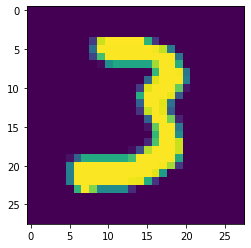

In [16]:
idx =0
dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[idx].view(1,784)

ps = torch.exp(net(img))
print(f'predicted number is:{int(torch.argmax(ps))}')
plt.imshow(images[idx].view(28,28))
plt.show